In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [3]:
(xtrain, ytrain), (xtest, ytest)=mnist.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

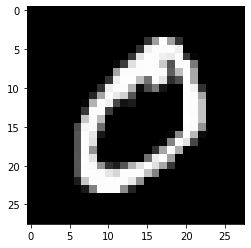

In [5]:
plt.imshow(xtrain[1,:,:],cmap='gray')

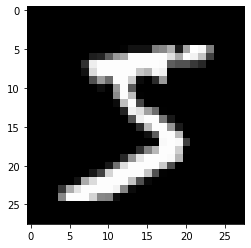

In [6]:
plt.imshow(xtrain[0,:,:],cmap='gray')

In [7]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [8]:
L = pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [9]:
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')

In [10]:
x_test.shape

(10000, 784)

In [11]:
x_train/=255
x_test/=255

In [12]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [13]:
#Initialize the constructor
model = Sequential()
#Define model architecture
model.add(Dense(784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
epochs = 20
batch_size = 512

In [16]:
history = model.fit(x_train, y_train, batch_size= batch_size, epochs=epochs, validation_split = .3, verbose= True)
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)

Epoch 1/20
83/83 [==============================] - 6s 55ms/step - loss: 0.7547 - accuracy: 0.7888 - val_loss: 0.2188 - val_accuracy: 0.9358
Epoch 2/20
83/83 [==============================] - 3s 42ms/step - loss: 0.1737 - accuracy: 0.9496 - val_loss: 0.1480 - val_accuracy: 0.9549
Epoch 3/20
83/83 [==============================] - 4s 42ms/step - loss: 0.1054 - accuracy: 0.9688 - val_loss: 0.1187 - val_accuracy: 0.9649
Epoch 4/20
83/83 [==============================] - 3s 40ms/step - loss: 0.0757 - accuracy: 0.9777 - val_loss: 0.1134 - val_accuracy: 0.9676
Epoch 5/20
83/83 [==============================] - 3s 39ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0991 - val_accuracy: 0.9704
Epoch 6/20
83/83 [==============================] - 4s 43ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.0987 - val_accuracy: 0.9720
Epoch 7/20
83/83 [==============================] - 4s 51ms/step - loss: 0.0291 - accuracy: 0.9925 - val_loss: 0.0878 - val_accuracy: 0.9747
Epoch 8/20
83

[0.9357777833938599, 0.9549444317817688, 0.9649444222450256, 0.9676111340522766, 0.9704444408416748, 0.972000002861023, 0.9747222065925598, 0.9750000238418579, 0.9750555753707886, 0.9763333201408386, 0.9764444231987, 0.9764999747276306, 0.9771666526794434, 0.977055549621582, 0.9772777557373047, 0.9775555729866028, 0.9781110882759094, 0.9787222146987915, 0.9781110882759094, 0.9789444208145142]
[0.8842856884002686, 0.9542381167411804, 0.9709761738777161, 0.9795476198196411, 0.9842857122421265, 0.9836905002593994, 0.9925476312637329, 0.9957619309425354, 0.9971428513526917, 0.9975714087486267, 0.99871426820755, 0.9992380738258362, 0.9997618794441223, 0.9998095035552979, 0.9998571276664734, 0.9999762177467346, 1.0, 0.9999762177467346, 1.0, 1.0]


<AxesSubplot:>

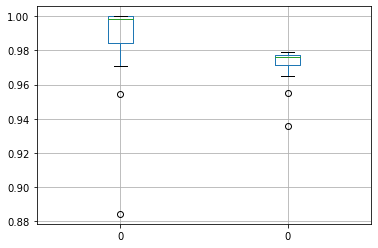

In [17]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta, va], axis=1)

tva.boxplot()

In [18]:
loss, acc = model.evaluate(x_test, y_test, verbose = 0)
print('Accuracy = %.3f'%acc)
print('loss = %.3f'%loss)

Accuracy = 0.982
loss = 0.072


In [19]:
y_predict = model.predict(x_test)

In [20]:
y_predict

array([[1.8510007e-10, 1.8778657e-11, 2.9452831e-08, ..., 9.9999547e-01,
        1.7875283e-09, 3.8515364e-07],
       [1.0986897e-11, 9.1957872e-09, 1.0000000e+00, ..., 4.5382060e-14,
        6.1971983e-10, 4.9556089e-17],
       [9.2695228e-07, 9.9996126e-01, 8.7181033e-06, ..., 2.0191632e-05,
        6.4278843e-06, 1.8416985e-08],
       ...,
       [9.7222061e-18, 8.7899223e-17, 7.4088582e-18, ..., 2.8275599e-10,
        6.2475606e-12, 4.7474464e-09],
       [8.0813354e-16, 4.3036523e-17, 4.1278372e-18, ..., 2.4144365e-15,
        9.6946551e-10, 2.7170170e-15],
       [1.7813801e-12, 3.6955573e-14, 1.4196470e-12, ..., 3.2049321e-17,
        8.7582969e-16, 8.4791836e-17]], dtype=float32)

In [21]:
np.argmax(y_predict[0])

7

In [22]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[ 971    1    1    1    1    0    3    1    1    0]
 [   0 1125    4    0    0    1    2    1    2    0]
 [   2    1 1016    2    0    0    2    6    3    0]
 [   0    0    1  998    0    2    0    3    3    3]
 [   1    0    3    1  963    0    2    2    2    8]
 [   2    0    0    6    1  868    7    1    5    2]
 [   6    2    2    1    6    4  936    0    1    0]
 [   1    4    8    2    0    0    0 1009    3    1]
 [   2    0    3    4    6    2    1    2  949    5]
 [   3    4    0    4    6    1    0    5    1  985]]
